<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg" align="left">
</div>
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">TFM - UEBA: Detección de Anomalías</p>
<p style="margin: 0; text-align:right;">20231 - Máster universitario en Ciencias de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicaciones</p>
</div>
</div>
<div style="width: 100%; clear: both;">
<div style="width:100%;">&nbsp;</div>

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Alejandro Ortega de los Ríos
</div>

# Extracción de características - HTTP

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
http_df = pd.read_csv('../data/http.csv')
features = pd.read_csv('features.csv')

In [3]:
http_df.head()

,id,date,user,pc,url,content
0,{V1Y4-S2IR20QU-6154HFXJ},01/02/2010 06:55:16,LRR0148,PC-4275,http://msn.com/The_Human_Centipede_First_Seque...,remain representatives consensus concert altho...
1,{Q5R1-T3EF87UE-2395RWZS},01/02/2010 07:00:13,NGF0157,PC-6056,http://urbanspoon.com/Plunketts_Creek_Loyalsoc...,festival off northwards than congestion partne...
2,{X9O1-O0XW52VO-5806RPHG},01/02/2010 07:03:46,NGF0157,PC-6056,http://aa.com/Rhodocene/rhodocenium/fhaavatqrf...,long away reorganized baldwin seth business 18...
3,{G5S8-U5OG04TE-5299CCTU},01/02/2010 07:05:26,IRM0931,PC-7188,http://groupon.com/Leonhard_Euler/leonhard/tne...,among german schwein experimental becomes prev...
4,{L0R4-A9DH29VP-4553AUWM},01/02/2010 07:05:52,IRM0931,PC-7188,http://flickr.com/Inauguration_of_Barack_Obama...,kate criteria j 2008 highest 12 include books ...


In [4]:
insiders_list = features[features['insider'] == 1]['user'].tolist()

In [5]:
print("Number of users: ", len(http_df['user'].unique()))

Number of users:  1000


## 1. Número de accesos web diarios

In [6]:
#Convierto a fecha
http_df['date'] = pd.to_datetime(http_df['date'], format='%m/%d/%Y %H:%M:%S')

#Obtengo día de la semana
http_df['weekday'] = http_df['date'].dt.weekday

#Elimino horas
http_df['date'] = http_df['date'].dt.date

#Filtro por días laborables y festivos
weekday_http = http_df[(http_df['weekday'] != 5) & (http_df['weekday'] != 6)]
weekend_http = http_df[(http_df['weekday'] == 5) | (http_df['weekday'] == 6)]

In [7]:
#Promedio de accesos diarios por usuario (laborables y fines de semana)
weekday_users_access = weekday_http.groupby(['user', 'date']).size()
weekend_users_access = weekend_http.groupby(['user', 'date']).size()

In [8]:
weekday_users_access = weekday_users_access.groupby('user').mean()
weekend_users_access = weekend_users_access.groupby('user').mean()

In [9]:
#Divido entre normal e insiders
weekday_normal_access = weekday_users_access[~weekday_users_access.index.isin(insiders_list)]
weekday_insiders_access = weekday_users_access[insiders_list]

weekend_insiders = set(weekend_users_access.index.tolist()) & set(insiders_list)

weekend_normal_access = weekend_users_access[~weekend_users_access.index.isin(weekend_insiders)]
weekend_insiders_access = weekend_users_access[weekend_insiders]

C:\Users\alexo\AppData\Local\Temp\ipykernel_7344\2437322701.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weekend_insiders_access = weekend_users_access[weekend_insiders]


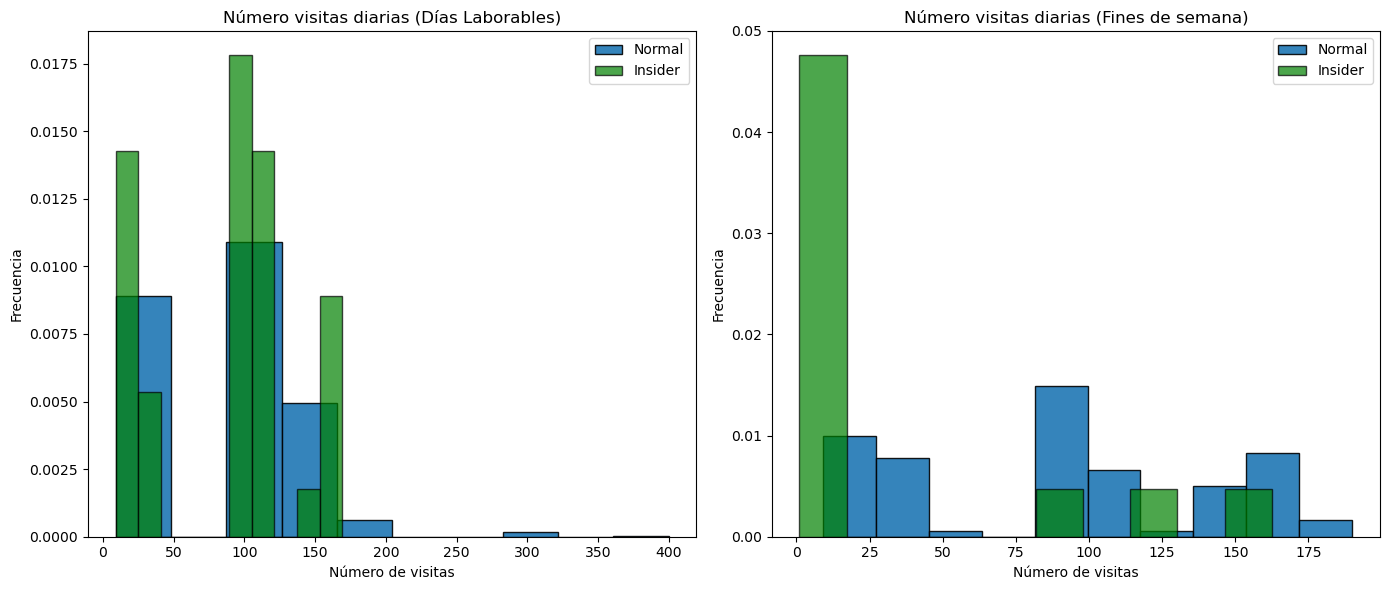

In [10]:
#Histograma - Número de visitas diarias
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

#Genero histograma para días laborables
axes[0].hist(weekday_normal_access, edgecolor='black', alpha=0.9, density=True, label='Normal')
axes[0].hist(weekday_insiders_access, edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
axes[0].set_xlabel('Número de visitas')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Número visitas diarias (Días Laborables)')
axes[0].legend()

#Genero histograma para días festivos
axes[1].hist(weekend_normal_access, edgecolor='black', alpha=0.9, density=True, label='Normal')
axes[1].hist(weekend_insiders_access, edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
axes[1].set_xlabel('Número de visitas')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Número visitas diarias (Fines de semana)')
axes[1].legend()

plt.tight_layout()
plt.show()

## 2. Sitios web maliciosos

### 2.1. Protocolo HTTP Seguro

In [11]:
def regex_secure(url):
    if re.match(r'^https:', url):
        return 1
    
    elif re.match(r'^http:', url):
        return 0

In [12]:
http_df['secure'] = http_df['url'].apply(regex_secure)

In [13]:
print("Número de sitios web con HTTP Seguro: {}".format(len(http_df[http_df['secure'] == 1])))
print("Número de sitios web con HTTP NO Seguro: {}".format(len(http_df[http_df['secure'] == 0])))
print("Número de registros del dataset: ", len(http_df))

Número de sitios web con HTTP Seguro: 0
Número de sitios web con HTTP NO Seguro: 28434423
Número de registros del dataset:  28434423


<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>Comentarios:</strong>
<br><br>
CERT dataset no contempla sitios web con protocolo seguro HTTPS. Sin duda esta variable habría sido una característica interesante a analizar a la hora de determinar el nivel de fiabilidad de un sitio web.
<br><br>
</div>

### 2.2. Direcciones recortadas

Las direcciones recortadas a menudo ocultan la verdadera URL, lo que facilita a los ciberdelincuentes engañar a las personas para que visiten sitios web fraudulentos. Estos sitios maliciosos pueden ser utilizados para robar información personal, distribuir malware

In [14]:
def detectar_url_recortada(url):
    regex = r"http://(bitly|tinyurl\.com|ow\.ly|is\.gd|t\.co)/(.)+"
    
    if re.search(regex, url):
        return 1
    else:
        return 0

In [15]:
http_df['shortened_url'] = http_df['url'].apply(detectar_url_recortada)

In [16]:
http_df[http_df['shortened_url'] == 1][['url', 'shortened_url']]

,url,shortened_url
103,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
431,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
1076,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
1089,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
1241,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
...,...,...
28430953,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
28431003,http://t.co/Sydney_Newman/nfbs/ovplpyrgbhevate...,1
28432061,http://t.co/Tropical_Storm_Faxai_2007/miyakeji...,1
28432094,http://t.co/Final_Fantasy_X2/personfirst/zbhag...,1


In [17]:
#Filtro por días laborables y festivos
weekday_http = http_df[(http_df['weekday'] != 5) & (http_df['weekday'] != 6)]
weekend_http = http_df[(http_df['weekday'] == 5) | (http_df['weekday'] == 6)]

#Filtro los registros con url recortadas
weekday_shortened = weekday_http[weekday_http['shortened_url'] == 1].groupby(['user', 'date']).size().groupby('user').mean()
weekend_shortened = weekend_http[weekend_http['shortened_url'] == 1].groupby(['user', 'date']).size().groupby('user').mean()

In [18]:
#Obtengo lista de insiders que usan url recortadas en laborables o fines de semana
weekday_insiders = set(weekday_shortened.index.tolist()) & set(insiders_list)
weekend_insiders = set(weekend_shortened.index.tolist()) & set(insiders_list)

#Filtro por insiders y normal
weekday_normal_shortened = weekday_shortened[~weekday_shortened.index.isin(weekday_insiders)]
weekday_insiders_shortened = weekday_shortened[weekday_insiders]

weekend_normal_shortened = weekend_shortened[~weekend_shortened.index.isin(weekend_insiders)]
weekend_insiders_shortened = weekend_shortened[weekend_insiders]

C:\Users\alexo\AppData\Local\Temp\ipykernel_7344\3087787663.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weekday_insiders_shortened = weekday_shortened[weekday_insiders]
C:\Users\alexo\AppData\Local\Temp\ipykernel_7344\3087787663.py:10: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  weekend_insiders_shortened = weekend_shortened[weekend_insiders]


In [19]:
print("Number of insiders using shortened URL on Weekdays: ", len(weekday_insiders))
print("Number of insiders using shortened URL on Weekends: ", len(weekend_insiders))

Number of insiders using shortened URL on Weekdays:  25
Number of insiders using shortened URL on Weekends:  0


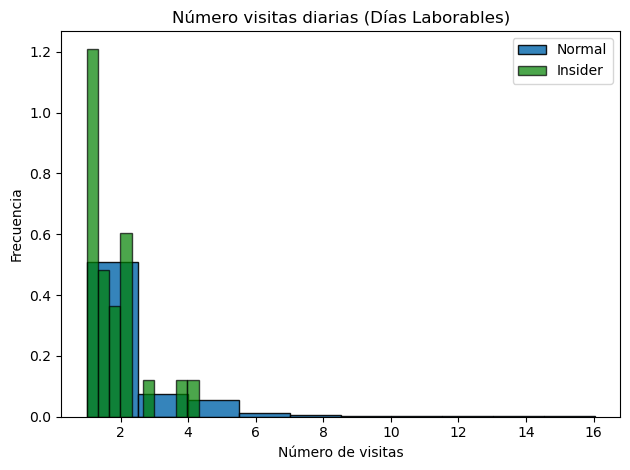

In [20]:
#Histograma - Número de visitas diarias a direcciones recortadas
plt.hist(weekday_normal_shortened, edgecolor='black', alpha=0.9, density=True, label='Normal')
plt.hist(weekday_insiders_shortened, edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
plt.xlabel('Número de visitas')
plt.ylabel('Frecuencia')
plt.title('Número visitas diarias (Días Laborables)')
plt.legend()

plt.tight_layout()
plt.show()

### 2.3. Dominio de nivel superior (TLD)

Los dominios de nivel superior (TLD) son la parte más alta de una dirección web, como ".com" o ".org". Estos TLDs proporcionan información sobre la naturaleza o la ubicación geográfica del sitio web. Algunos TLDs, como ".gov" o ".edu", tienden a transmitir credibilidad y confianza debido a sus procesos de verificación estrictos.

Aunque no exista relación directa entre la seguridad del sitio web y el TLD, puede ser interesante determinar (durante la selección de características) si esta variable captura alguna relación para determinar el nivel de fiabilidad del sitio web visitado.

In [22]:
#Extraigo TLD
tld_regex = r"([a-zA-Z0-9-]+\.)+(com|org|net|uk|us|gov|am|eu|co|fm|tv|li|me|ph)\S*"
http_df['tld'] = http_df['url'].str.extract(tld_regex)[1]

In [23]:
#Tipos de dominio en el dataset
http_df['tld'].unique()

array(['com', 'org', 'net', 'gov', 'co', 'am', 'li', 'uk', 'fm', 'eu',
       'us', 'tv', 'me', 'ph'], dtype=object)

In [37]:
#Valor promedio diario
tld_df = http_df.groupby(['user', 'date', 'tld']).size().groupby(['user', 'tld']).mean()
tld_df = tld_df.reset_index()

In [40]:
#Divido entre insidesr y normal
tld_insiders = tld_df[tld_df['user'].isin(insiders_list)
tld_normal = tld_df[~tld_df['user'].isin(insiders_list)]

In [50]:
#Valor promedio
tld_insiders_count = tld_insiders.groupby(['tld']).mean().reset_index()
tld_normal_count = tld_normal.groupby(['tld']).mean().reset_index()

C:\Users\alexo\AppData\Local\Temp\ipykernel_7344\3900188072.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tld_insiders_count = tld_insiders.groupby(['tld']).mean().reset_index()
C:\Users\alexo\AppData\Local\Temp\ipykernel_7344\3900188072.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tld_normal_count = tld_normal.groupby(['tld']).mean().reset_index()


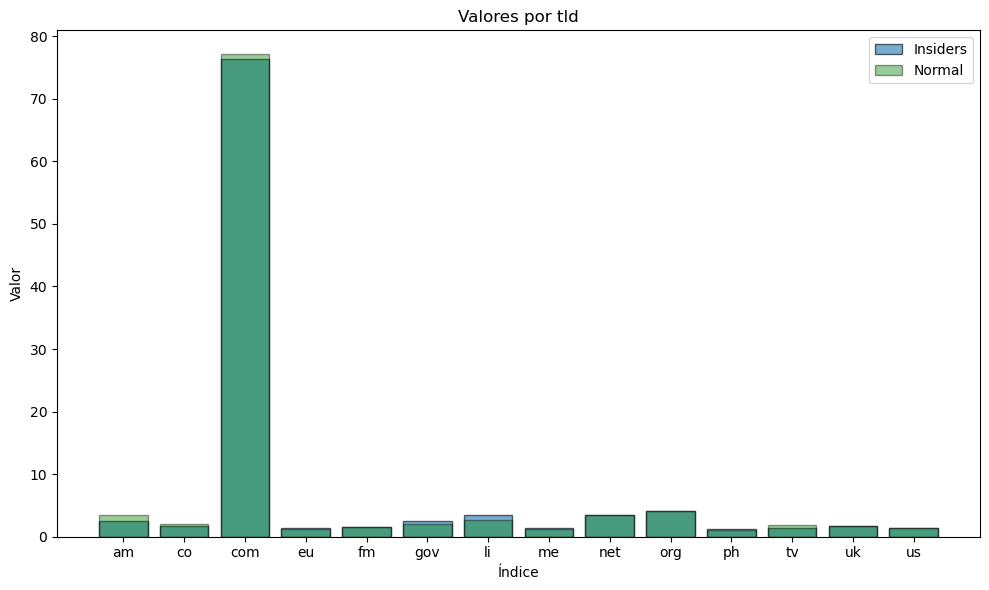

In [64]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tld_insiders_count.index, tld_insiders_count[0], edgecolor='black', alpha= 0.6, label='Insiders')
plt.bar(tld_normal_count.index, tld_normal_count[0], color='green', alpha= 0.4, edgecolor='black', label='Normal')

# Añadir título y etiquetas de los ejes
plt.title('Valores por tld')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.xticks(tld_insiders_count.index, tld_insiders_count['tld'])  # Añadir las etiquetas de 'tld' en el eje x
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [209]:
#Normalizo la columna tld para convertir en campo cada dominio
tld_cleaned_df = tld_df.pivot_table(index='user', columns='tld', values=0).fillna(0).reset_index()
tld_cleaned_df = tld_cleaned_df.rename(columns={col: 'tld_' + col if col != 'user' else col for col in tld_cleaned_df.columns})
tld_cleaned_df.head()

tld,user,tld_am,tld_co,tld_com,tld_eu,tld_fm,tld_gov,tld_li,tld_me,tld_net,tld_org,tld_ph,tld_tv,tld_uk,tld_us
0,AAE0190,4.483986,0.000000,127.927746,0.0,1.875000,1.890110,0.0,0.0,5.504792,3.010101,1.000000,6.271845,1.500000,1.27451
1,AAF0535,0.000000,1.000000,23.225610,0.0,1.333333,0.000000,0.0,0.0,1.827160,4.775000,0.000000,0.000000,1.536842,1.00000
2,AAF0791,1.000000,1.857143,83.393064,1.0,1.333333,1.000000,0.0,1.0,4.566343,5.913690,1.000000,0.000000,2.284884,1.00000
3,AAL0706,0.000000,1.000000,7.699422,0.0,0.000000,1.532258,0.0,0.0,1.257576,1.422460,1.139535,0.000000,1.043478,1.00000
4,AAM0658,0.000000,1.000000,23.200000,0.0,0.000000,0.000000,0.0,0.0,2.107143,4.023474,1.000000,0.000000,1.244898,0.00000


### 2.3. Dominios menos comunes (potencialmente maliciosos)

In [85]:
url_regex = r"(?<=://)(.*?\.(?:com|org|net|uk|us|gov|am|eu|co|fm|tv|li|me|ph))"
http_df['url'] = http_df['url'].str.extract(url_regex)

In [137]:
#Lista negra de sitios web
url_top = http_df['url'].value_counts()

# Escojo los 15 menos comunes del dataset
least_common = url_top.nsmallest(15)

In [138]:
print(least_common)

www.best-spy-soft.com             1
www.actionalert.com               2
www.spectorsoft.com               3
cars.com                          3
www.webwatchernow.com             3
www.keylogpc.com                  4
www.softactivity.com              4
www.actualkeylogger.com           4
www.relytec.com                   5
download.cnet.com                 6
www.wellresearchedreviews.com     6
www.dailykeylogger.com            6
blackhatworld.com                 8
www.refog.com                     9
wikileaks.org                    69
Name: url, dtype: int64


In [139]:
#Exploración visual del conjunto de dominios - Eliminación de valores
least_common = least_common.drop(["download.cnet.com", "cars.com"])

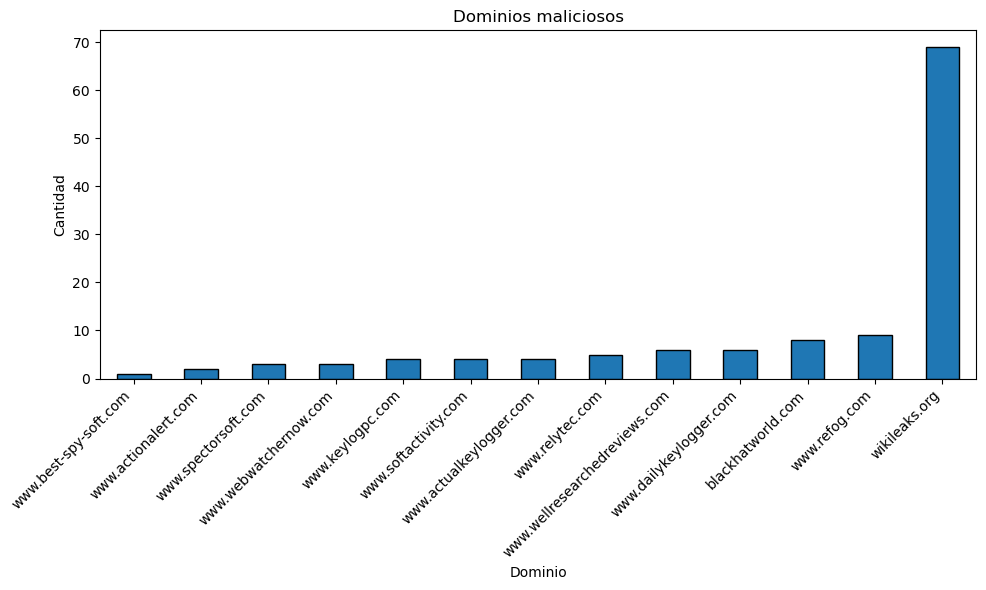

In [140]:
#Diagrama de barras - Lista negra de dominios
plt.figure(figsize=(10, 6))
least_common.plot(kind='bar', edgecolor='black')
plt.xlabel('Dominio')
plt.ylabel('Cantidad')
plt.title('Dominios maliciosos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../img/black_domains.jpg')
plt.show()

Los dominios menos visitados como norma general corresponderán con los potencialmente maliciosos. Ya lo hemos visto con "cars.com", que ha sido eliminado dado que es un dominio seguro. Del mismo modo, sitios más visitados como "thepiratebay.org" y "lifehacker.com" deberían ser añadidos.

In [141]:
#Exploración visual del conjunto de dominios - Inputación de valores
least_common["thepiratebay.org"] = url_top["thepiratebay.org"]
least_common["lifehacker.com"] = url_top["lifehacker.com"]

In [155]:
#Dominios maliciosos - Clase categórica
black_list = least_common.index.tolist()
http_df['black_domain'] = http_df['url'].apply(lambda x: 1 if x in black_list else 0)

In [182]:
#Promedio diario de dominios maliciosos visitados
black_counts = http_df[http_df['black_domain'] == 1].groupby(['user', 'date']).size().groupby('user').mean()

#Lista de insiders que visitan dominios maliciosos
black_insiders_list = set(black_counts.index) & set(insiders_list)
black_insiders = black_counts[black_insiders_list]
black_normal = black_counts[~black_counts.index.isin(black_insiders_list)]

black_insiders_percentage = 100 * len(black_insiders) / len(insiders_list)
print("Número de insiders que visitan dominios maliciosos: {} ({}%)".format(len(black_insiders), 
                                                                            round(black_insiders_percentage, 2)))

Número de insiders que visitan dominios maliciosos: 54 (77.14%)


C:\Users\alexo\AppData\Local\Temp\ipykernel_7344\2111957548.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  black_insiders = black_counts[black_insiders_list]


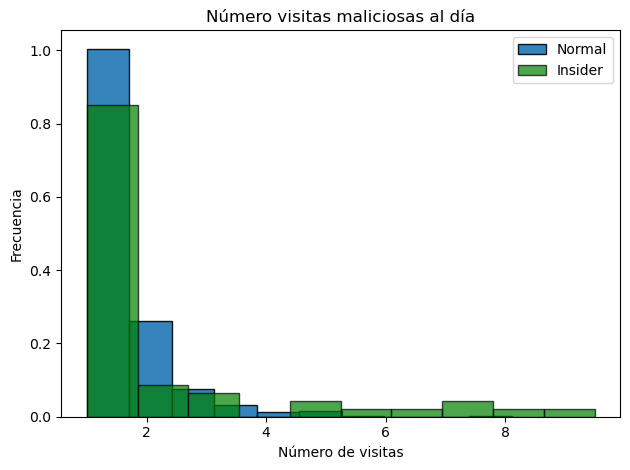

In [184]:
#Histograma - Número de visitas diarias a direcciones maliciosas
plt.hist(black_normal, edgecolor='black', alpha=0.9, density=True, label='Normal')
plt.hist(black_insiders, edgecolor='black', color='green', alpha=0.7, density=True, label='Insider')
plt.xlabel('Número de visitas')
plt.ylabel('Frecuencia')
plt.title('Número visitas maliciosas al día')
plt.legend()

plt.tight_layout()
plt.show()

## 3. Espacio de Características

In [201]:
##Convierto a diccionario

#Accesos diarios
weekday_users_access_dict = weekday_users_access.to_dict()
weekend_users_access_dict = weekend_users_access.to_dict()

#URL recortadas
weekday_shortened_dict = weekday_shortened.to_dict()

#Dominios maliciosos
black_counts_dict = black_counts.to_dict()

In [202]:
#Mapeo diccionarios y los convierto en columnas de features
features['weekday_http'] = features['user'].map(weekday_users_access_dict).fillna(0)
features['weekend_http'] = features['user'].map(weekend_users_access_dict).fillna(0)
features['url_shortened'] = features['user'].map(weekday_shortened_dict).fillna(0)
features['black_domains'] = features['user'].map(black_counts_dict).fillna(0)

In [210]:
#Combino con el dataset tld_cleaned_df
features_merged = features.merge(tld_cleaned_df, on='user', how='left')
features_merged.drop(columns=['Unnamed: 0'], inplace=True)

In [211]:
features_merged.head()

,user,email_size,attachments,recipients,working_day_emails,address_count,weekend_emails,insider,working_day_files,weekend_files,...,tld_fm,tld_gov,tld_li,tld_me,tld_net,tld_org,tld_ph,tld_tv,tld_uk,tld_us
0,LAP0338,30020.394184,0.377839,1.638930,13.655072,2,2,0,0,0,...,0.0,1.062500,0.0,1.304878,2.390805,1.505495,1.0,0.0,1.000000,0.0
1,MOH0273,30397.402083,0.758333,1.670833,2.962963,2,8,0,23,22,...,0.0,0.000000,0.0,1.000000,6.741848,2.861386,0.0,0.0,1.000000,0.0
2,HVB0037,29958.497676,0.000000,1.658367,8.705202,3,13,0,0,0,...,0.0,4.352751,0.0,0.000000,3.812317,3.802260,1.0,0.0,1.654321,0.0
3,NWK0215,29828.181548,0.431548,1.651786,1.000000,2,12,0,0,0,...,1.4,2.333333,0.0,1.000000,2.440758,4.394299,0.0,1.0,2.354167,0.0
4,LRR0148,29895.532625,0.930197,1.587253,2.941964,2,13,0,3,3,...,1.5,0.000000,0.0,2.184739,5.390052,17.402010,1.0,0.0,3.333333,1.0


In [214]:
#Guardo espacio de características en fichero
features_merged.to_csv('features.csv')